# Lab 3 : Classification




### Summary of the lab session : 


#### I) Basic application of classification models on toy dataset : 
    - Logistic Regression
    - LDA
    - SVM
    - Kernels

    
#### II) Marketing project : 
    - Presentation of pandas
    - Feature engineering 
    - Models 

In [1]:
# Import the packages
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

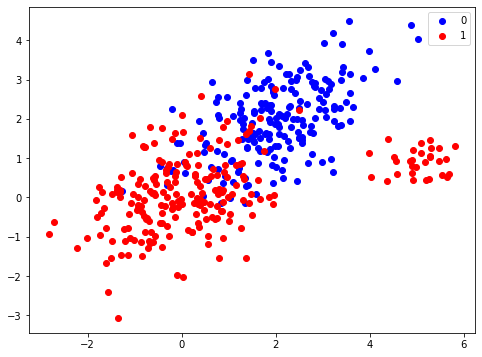

In [2]:
# Import the data 
plt.figure(figsize=(8,6))
data = np.loadtxt('NLS_2.csv',delimiter=",")
X = data[:,:2]
y = data[:,2]

color = ['b','r']
labels = ['0','1']
for i in range(len(color)) : 
    idx=np.where(data[:,2]==i)
    plt.scatter(data[idx,0],data[idx,1], c=color[i], marker='o',label=labels[i])
plt.legend()

### Recap Classification : 
Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping/decision function $(\hat{f})$ from input variables ($X$) to discrete output variables $(y)$.

In a data-science project the common practice is to split randomly your data between three datasets :

- a train dataset for fitting the paramaters of the models
- a test data set to compute the test-error on unseen data and deduce the hyperparameters (like regularisation value C) which minimise the test error 
- finally a generalisation dataset to evaluate the final error of the models i.e the error on unseen data with a tuned model. 

#### => In this Lab session we are going to use only 2 datasets : a train dataset for fitting the parameters and a test-generalisation dataset for finding the best parameters and evaluate the generalisation error.


A more advanced advanced way to split the data is the use of the cross validation, you will see this later normally.


### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Logistic Regression - Recap :

The idea is to put a probabilistic model on the Random Variable $Y \text{ (label) }$ given  $ X(\text{features)}$ for an observed data. We suppose that : 
$$ P(Y=1|X=x)=\frac{1}{1+e^{-\langle X,\beta \rangle}}=\frac{1}{1+e^{-(X^1\beta_1 +...X^p\beta_p )}}$$
So the goal of the fitting part is to find the vector $\beta$ maximising the likelihood of the train dataset

### Question : Write the log-likelihood for the train dataset i.e $((x_1,y_1),...(x_n,y_n))$ :

Answer : 

We consider the labels $y$ to be 1 or 0

The likelikehood function is equal to:

$\mathcal{l}(Y;\beta,X) = \prod_{i=1}^n p(x_i)^y_i \cdot (1-p(x_i))^{1-y_i}$

where $p(x_i)$ equals to probability that observation $x_i$ has label 1. 

$p(x_i) = \frac{1}{1+e^{-(X^1\beta_1 +...X^p\beta_p )}} $

Therefore the log-likelihood is equal to: 

$\mathcal{L}(Y;\beta,X)= \sum_{i=1}^n y_i \cdot \log(p(x_i) + y_i \cdot (1-y_i) \cdot \log(1-p(x_i)) \iff$

$\mathcal{L}(Y;\beta,X) = \sum_{i=1}^n y_i \cdot \langle X^i,\beta \rangle + \log(\frac{1}{1+e^{\langle X^i,\beta \rangle}}) $

where 
- $X^i$ is a $i^{th}$ observation therefore vector of size $(1,p)$, $p$-number of features.
- $\beta$ is a vector of model parameters of size $(1,p)$
- $n$ is a number of observations



### After the training, $\beta$ is set. How does the model assign the labels for the test dataset i.e $((x'_1,y_1),...(x'_k,y'_k))$. 

Answer : When $\beta$ is set, model computes probability of $p(x_i)$. If it is bigger or equal to $0.5$ it assgins label $1$. Otherwise it assigns label $0$.

### Task : Fit a Logistic Regression model on the train dataset with arbitrary regularisation
use : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression

#fitting model with default regularization 1
model = LogisticRegression(penalty = "l2").fit(X_train, y_train)

Now it's time to evaluate the performances of our model. There are plenty of metrics for classification problem, we will work with two non neglible metrics.
$$ \text{Accuracy} = \frac{\text{Number of right classifications}}{\text{Number of classifications}} $$


$$Auc = P(\hat{f(X)} >\hat{f(X')}|Y=1 , Y'=0) $$

Given a randomly chosen observation $X$ belonging to class 1, and a randomly chosen observation $X'$ belonging to class 0, the AUC is the probability that the evaluated classification algorithm will assign a higher score to X than to X'. For instance the score of our Logisitic model is $P(Y=1|X=x)$


PS : The AUC could be considered as the most important metric in a classification problem, because it's insentitive to unbalanced dataset.

### TASK : Print the Accuracy and the AUC of our model on the test dataset
use : 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score

#making predictions of test set
y_pred = model.predict(X_test)

#calculating metrics on test set
acu = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(f"Model accuracy: {acu}")
print(f"Model auc score: {auc}")

Model accuracy: 0.8028169014084507
Model auc score: 0.9035139964264444


We need to tune the hyperparameters especially the regularisation parameter (C).

### Task : Fill error_c_Logistic.
For a list of predefined C values, the function plot_error_c_Logistic will fit a model and compute the error for each value of C in order to select the parameters with the highest accuracy or AUC. 
Return the best C and plot the test accuracy with respect to C, with a L2 regularisation. Try with different C beetwen 0.01 and 1

We can use np.linspace(0.01,1,n) to divide equally [0.01,1] 

In [15]:
def error_c_Logistic(X_train,X_test,y_train,y_test,C):
    test_acu = list()
    test_auc = list()
    for c in C:
        #fitting model
        model = LogisticRegression(penalty = "l2", 
                                   C = c).fit(X_train, y_train)
        
        #predicting values
        y_pred = model.predict(X_test)
        
        #calculating performance score on test data
        acu = accuracy_score(y_test,y_pred)
        auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
        
        #appending to list of all test metrics
        test_acu.append(acu)
        test_auc.append(auc)
    
    #plotting graphs
    plt.plot(C, test_acu, label = "Accuracy")
    plt.plot(C, test_auc, label = "AUC")
    plt.xlabel('C')
    plt.ylabel('Performance function')
    plt.legend()
    plt.show()
    
    #finding C for maximum acu and acuracy 
    c_max_acu = C[test_acu.index(max(test_acu))]
    c_max_auc = C[test_auc.index(max(test_auc))]
    print(f"Maximal test Accuracy - {max(test_acu)} - is obtained for c = {c_max_acu}")
    print(f"Maximal test auc - {max(test_auc)} - is obtained for c = {c_max_auc}")
    return c_max_acu, c_max_auc

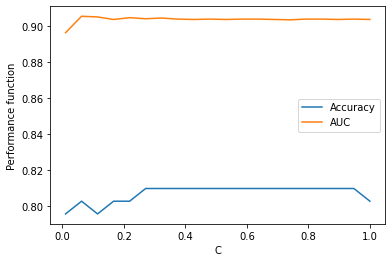

Maximal test Accuracy - 0.8098591549295775 - is obtained for c = 0.2705263157894737
Maximal test auc - 0.905300774270399 - is obtained for c = 0.06210526315789474


In [16]:
C = np.linspace(0.01,1,20)
c_max_acu, c_max_auc = error_c_Logistic(X_train,X_test,y_train,y_test,C)

### Task : Train a model with the best value of C and return the AUC and the accuracy

We choose c equal to  0.06210526315789474 as both AUC has highest value for this parameter.

In [17]:
#fitting model
model = LogisticRegression(penalty = "l2", 
                           C = c_max_auc).fit(X, y)

#predicting values
y_pred = model.predict(X_test)

#calculating performance score on test data
acu = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

#printing metrics
print(f"Model accuracy: {acu}")
print(f"Model auc score: {auc}")

Model accuracy: 0.795774647887324
Model auc score: 0.9045066507841969


# LDA 

As the Logistic Regression, LDA puts a probalistic model on the data. This time $P(Y)$ and $P(X |Y)$ are modelized. It assumes that X are sampled from a K gaussian mixture with K the number of classes.
$$P(Y=k) = \frac{\text{Number of train samples labeled K}}{\text{Number of train sample}}$$

$$P(X=x |Y=k) = \mathcal{N}(x,\mu_k,\Sigma_k) $$



### Question :  How does the model assign the labels for the test dataset 

Answer : 

The LDA classifier assumes that the observations in the $k^{th}$ class are drawn from a multivariate Gaussian distribution 
$\mathcal{N}(μ_k,Σ)$, where $μ_k$ is a class-specific mean vector, and $Σ$ is a covariance matrix that is common to all K classes. LDA classifier computes following:

$\hat \delta (x) = x^T \Sigma^{-1} \hat \mu_k - \frac{1}{2} \hat \mu_k \Sigma^{-1} \hat \mu_k + \log(\hat \pi_k)$

where:
- $\hat \delta_k (x)$ is the estimated discriminant score
- $\hat \mu_k$ is the average of all the training observations from the $k^{th}$ class.
- $\Sigma$ is estimated covariance matrix on training data.
- $\hat \pi_k$ is the prior probability that an observation belongs to the $k^{th}$ class.

A new observation will be assigned to class k where the discriminant score $\hat \delta_k(x)$ is largest.



### Task : Fit a LDA model on the train dataset and returns the test metrics

In [28]:
class CustomLDA():
    def __init__(self):
        self.means = []
        self.priors = []
        self.covariance_inv = []
        self.classes = []
        
    def fit(self,X,y):
        num_observations, num_params = X.shape
        num_classes = len(np.unique(y))
        
        self.classes = np.unique(y)
        
        #computing mean vector per class and priors:
        for c in self.classes:
            #means
            self.means.append(np.mean(X[y==c], axis = 0))
            #priors
            self.priors.append(len(y[y==c])/len(y))
        
        #computing covariance
        cov = np.zeros(shape=(X.shape[1], X.shape[1])) 
        for c in self.classes: 
            Xg = X[y == c, :] 
            cov += np.count_nonzero(y==c) / len(y) * np.cov(Xg.T, bias=1) 
        self.covariance_inv = np.linalg.inv(cov)
    
    def compute_score(self,x, k):
        mean_k = self.means[k].reshape((x.size,1))
        prior = self.priors[k]
        cov_invers = self.covariance_inv
        return x @ cov_invers @ mean_k - 1/2 * mean_k.T @ cov_invers @ mean_k + np.log10(prior)
    
    def predict(self,X):
        result = []
        for x in X:
            #computing discriminant scores
            scores = []
            for c in range(len(self.classes)):
                scores.append(self.compute_score(x,c))
            #index of a class
            idx = np.argmax(scores)
            result.append(self.classes[idx])
        return np.asarray(result)
    
    @staticmethod
    def proba(x):
        e_x = np.exp(x)
        return e_x / e_x.sum()
    
    def predict_proba(self,X):
        result = []
        posterior = []
        for x in X:
            #computing discriminant scores
            scores = []
            for c in range(len(self.classes)):
                scores.append(self.compute_score(x,c))
            #index of a class
            idx = np.argmax(scores)
            result.append(self.classes[idx])
            posterior.append(float(self.proba(scores)[idx]))
               
        return np.column_stack((result,posterior))
        

In [29]:
#fitting model
model = CustomLDA()
model.fit(X_train, y_train)

#predicting values
y_pred = model.predict(X_test)

#calculating performance score on test data
acu = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

#printing metrics 
print(f"Model test accuracy: {acu}")
print(f"Model test auc score: {auc}")

Model test accuracy: 0.8028169014084507
Model test auc score: 0.5239229700218384


In [11]:
#comparing to the sikit learn implementation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#fitting model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

#predicting values
y_pred = model.predict(X_test)

#calculating performance score on test data
acu = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

#printing metrics 
print(f"Model test accuracy: {acu}")
print(f"Model test auc score: {auc}")

Model test accuracy: 0.8098591549295775
Model test auc score: 0.9009330950962874


Difference in AUC comes from different ways of estimating posterior probaility. I use softmax, sikit learn uses different function when number of classes is equal to 2

# SVM
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. 

### Question Bonus : Suppose that the labels $\in \{1,-1\}$. Write the Loss fonction $\mathcal{L}(y,x;\theta)$ of the SVM for a train dataset ((x_1,y_1),...(x_n,y_n)). Then compare to the Logistic Regression with Ridge regularization and comment. 

### Answer :

Let's define loss function for observations $x_i$ and paremters of model $\theta$

$L(x,y;\theta)=\sum_i^n f(x_i,y_i,\theta)+R(\theta)$

In SVM: 
- $R(\theta) = \frac{1}{2}||\theta||^2$
- $f(x_i,y_i,\theta) = \text{ hinge loss } = \max(0,1-y_i(\theta^Tx_i))$

In Logistic Regression with Ridge regularization there are two ways of writing loss depending on $y$ labels. When $y_i \in \{-1,1 \}$:
- $R(\theta) = \frac{1}{2}||\theta||^2$
- $f(x_i,y_i,\theta) = \text{ logistic loss } = \ln(1+e^{-y_i\theta^Tx_i})$

As the regularization term is the same we can compare only loss term dependen on $x_i$. We can see they are similar but not the same, logistic loss is smooth. (0-1) is an indicator whether $y\cdot\theta^Tx_i>0$

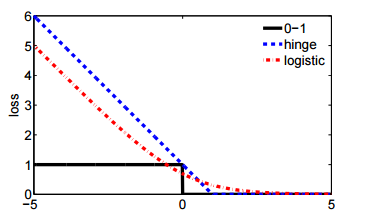

x axis is $y \cdot \theta^Tx_i$

### Task : Fit a SVM model on the train dataset and return the test metrics
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [39]:
from sklearn.svm import SVC

#fitting model on train data
model = SVC(probability=True)
model.fit(X_train, y_train)

#predicting values
y_pred = model.predict(X_test)

#calculating performance score on test data
acu = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

#printing metrics 
print(f"Model test accuracy: {acu}")
print(f"Model test auc score: {auc}")

Model test accuracy: 0.8802816901408451
Model test auc score: 0.9616835417907484


# Kernels

A Kernel function transforms the training data so that a non-linear decision surface is transformed to a linear equation in a higher number of dimensions.
Linear discriminant functions can provide very efficient 2-class classifiers, provided that the class features can be separated by a linear decision surface.

The SVM model from sklearn have kernels already implemented. 
### Task : Try SVM with different kernels to increase the test accuracy

In [42]:
def plot_per_kernel_performance(X_train,X_test,y_train,y_test):
    #all possible kernels implemented in sickit learn SVM
    kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 
    acu_list = list()
    auc_list = list()
    for kernel in kernels:
        #fitting model on train data
        model = SVC(kernel = kernel, probability=True)
        model.fit(X_train, y_train)

        #calculating test score
        y_pred = model.predict(X_test)
        acu = accuracy_score(y_pred,y_test)
        auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
        
        #append test metrics on this particular kernel
        acu_list.append(acu)
        auc_list.append(auc)
    
    #plotting accuracy and auc
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].bar(kernels,acu_list)
    ax[0].set_title('Test accuracy', size=16)
    ax[0].set_xlabel("Kernel")
    ax[0].set_ylabel("Metric value")
    
    ax[1].bar(kernels,auc_list)
    ax[1].set_title('Test auc', size=16)
    ax[1].set_xlabel("Kernel")
    ax[1].set_ylabel("Metric value")

    plt.show()
    
    #finding maximal accuracy and auc
    k_max_acu = kernels[acu_list.index(max(acu_list))]
    k_max_auc = kernels[auc_list.index(max(auc_list))]
    
    #printing kernels that give highest acu and auc 
    print(f"Maximal test Accuracy - {max(acu_list)} - is obtained for kernel = {k_max_acu}")
    print(f"Maximal test auc - {max(auc_list)} - is obtained for kernel = {k_max_auc}")

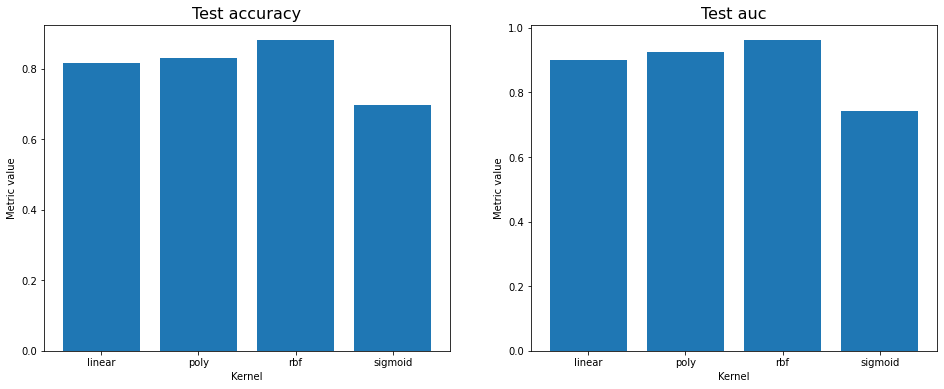

Maximal test Accuracy - 0.8802816901408451 - is obtained for kernel = rbf
Maximal test auc - 0.9617828072265238 - is obtained for kernel = rbf


In [43]:
plot_per_kernel_performance(X_train,X_test,y_train,y_test)

### Plot decision function

In order to visualize the impact of the kernels, we are going to plot the decision fonction for different models : Logistic Regression, LDA, Vanilla SVM, SVM with polynomial kernel, SVM with RBF kernel.
### Just run the code below

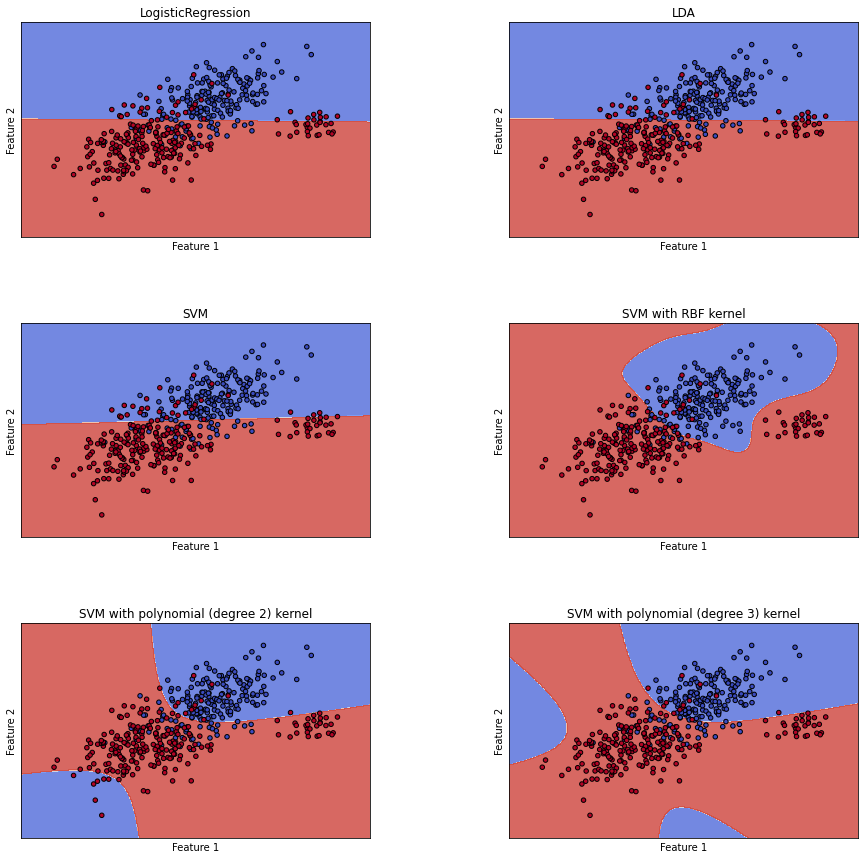

In [44]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




C = 1.0  # SVM regularization parameter

models = (LogisticRegression(C=10),
          LDA(),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)
# title for the plots
titles = ('LogisticRegression',
          'LDA',
          'SVM',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 2) kernel','SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.

fig, sub = plt.subplots(3, 2,figsize=(15,15))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Logistic Regression Kernelized

As it has been done with the SVM function, we are going to improve the logistic regression with a Kernel in order to bring a bit more flexibility to the decision function

### Task : Fill the kernel function below, it must transform your input data in a higher dimensionnal space. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html for a polynomial kernel for instance

In [47]:
from sklearn.preprocessing import PolynomialFeatures

class Logit_Kernel():
    # Class for Kernelized Logistic Regression :
    model = None
    C=None
    def __init__(self,C):
        self.C=C
        
    def fit(self, X, y):
        self.model=LogisticRegression(C=self.C)
        self.model.fit(self.kernel(X),y)
        
    def predict(self,X):
        return self.model.predict(self.kernel(X))
    
    def predict_proba(self,X):
        return self.model.predict_proba(self.kernel(X))

    def kernel(self,X):
        poly = PolynomialFeatures(2) #degree of kernel will be fixed to 2
        X_0 = poly.fit_transform(X) #we use contant term, interaction, squares and identity values
        return X_0      

In [50]:
#Testing model on test data - better performance than rest of the models in this notebook

#fitting model
clf = Logit_Kernel(C=1)
clf.fit(X_train,y_train)

#predicitng on test set
y_pred = clf.predict(X_test)

#calculating metrics on test set
acu = accuracy_score(y_pred,y_test)
auc = roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

#printing metrics
print(f"Model test accuracy: {acu}")
print(f"Model test auc score: {auc}")

Model test accuracy: 0.8873239436619719
Model test auc score: 0.9523525908278737


After filling the kernel function just run the following code. It must print the same decision graph as before.
### Just run the code below

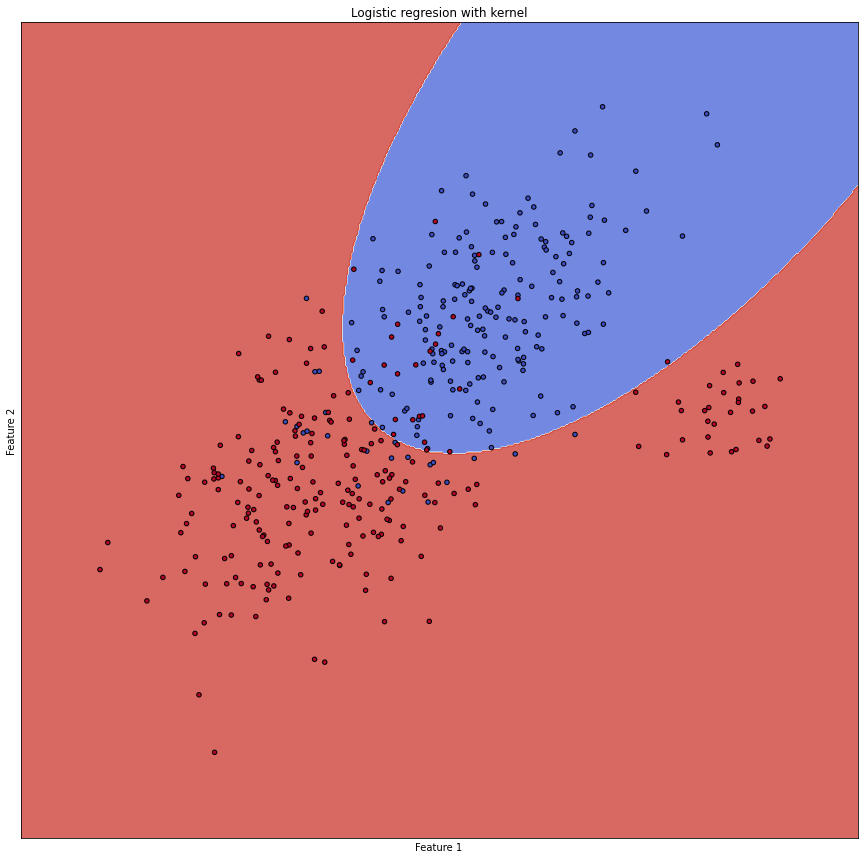

In [49]:
def plot_contours(ax,X,y, **params):
    clf = Logit_Kernel(C=1)
    clf.fit(X,y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



fig, ax = plt.subplots(1,figsize=(15,15))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, X,y,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1 ')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Logistic regresion with kernel')

plt.show()

# Exercice 2 : Classification Project

 Now you are going to apply the methods you've seen on a real-like data science project.
 
 The data is related with direct marketing campaigns of a Portuguese banking institution. 
 The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
 in order to access if the product (bank term deposit) would be (or not) subscribed. 


   The classification goal is to predict if the client will subscribe a term deposit (variable y).
   
## Features - bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
    
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   #other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Pandas library 

In this lab session we put aside the numpy's arrays, we will use the pandas library for the structure of our dataset. Pandas is preferred to numpy in this domain because of its simplicity and it suits wells for data science projects.

Here is a sample of the most useful pandas commands

In [51]:
#Import the dataset
bank = pd.read_csv('bank-full.csv',sep=';')
bank = bank.drop(bank.loc[bank['y']=='no'].sample(25000).index)
bank = bank.sample(10000)
bank = bank.reset_index(drop=True)

### Task : Above each command, tell what it does

In [52]:
# This method prints first n rows of pandas data frame. By default, so when not specified, n equals to 5.
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,management,single,tertiary,no,454,no,no,cellular,14,aug,76,3,-1,0,unknown,no
1,44,entrepreneur,married,tertiary,no,1631,yes,no,cellular,17,nov,81,1,195,2,failure,no
2,28,blue-collar,single,secondary,no,-197,yes,no,unknown,9,may,2016,2,-1,0,unknown,yes
3,52,management,married,tertiary,no,-970,yes,no,cellular,4,feb,489,1,-1,0,unknown,yes
4,52,technician,divorced,secondary,no,2816,no,no,unknown,20,jun,492,3,-1,0,unknown,no


In [53]:
# It shows first 5 rows from data frame limited to columns "balance" and "age" 
bank[['job','balance']].head()

,job,balance
0,management,454
1,entrepreneur,1631
2,blue-collar,-197
3,management,-970
4,technician,2816


In [54]:
# It shows 5 first rows from data frame limited to columns "balance" and "age" that have value "yes" in default column
bank.loc[bank['default']=='yes',['balance','age']].head()

,balance,age
13,-9,31
97,9,32
255,11,45
265,-22,37
305,0,54


In [55]:
#Firstly it changes values of column "y" which have "yes" value to 1
#Then it changes values of column "y" which have "no" value to 0
#Shows 5 first rows of modified data frame
bank.loc[bank['y']=='yes','y']=1
bank.loc[bank['y']=='no','y']=0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,management,single,tertiary,no,454,no,no,cellular,14,aug,76,3,-1,0,unknown,0
1,44,entrepreneur,married,tertiary,no,1631,yes,no,cellular,17,nov,81,1,195,2,failure,0
2,28,blue-collar,single,secondary,no,-197,yes,no,unknown,9,may,2016,2,-1,0,unknown,1
3,52,management,married,tertiary,no,-970,yes,no,cellular,4,feb,489,1,-1,0,unknown,1
4,52,technician,divorced,secondary,no,2816,no,no,unknown,20,jun,492,3,-1,0,unknown,0


In [56]:
#Gives descriptive statistics (number of observations, mean, standard deviation, minimum, maximum, 
#25th percentile, 50th percentile, 75th percentile) about each numeric column of data frame
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.876900,1409.598800,15.688900,302.210700,2.688800,45.136100,0.691200
std,11.214407,3110.334769,8.384709,297.427531,3.053733,104.584504,3.400059
min,18.000000,-3372.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,86.000000,8.000000,116.000000,1.000000,-1.000000,0.000000
50%,39.000000,485.000000,16.000000,207.000000,2.000000,-1.000000,0.000000
75%,48.000000,1519.000000,21.000000,376.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,55.000000,854.000000,275.000000


# Feature engineering

Now you've got the minimum vital commands for interacting with your dataset. 
We are going to prepare our data for fitting our models.

As you may have seen, some features are categorical (i.e not real number) and thus cannot be understood by our models. The most common way to fix this is the use of one hot encoding method. For each value of a categorical feature the one encoding create a new feature which will be equal to one or zero depending on the value of the feature for the rows.

For instance the marital status takes its values in \{single,married,divorced\}.
The one hot encoding value of divorced is [0,0,1], it also could be [0,Ø]

use : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Task : Apply the one hot encoding on the dataset.

In [57]:
#list of categorical columns names
cat_columns = ["job","marital","education","default","housing","loan","contact","month","poutcome"]

bank_transformed = bank
for col in cat_columns:
    
    # get the dummies and store it in a variable
    dummies = pd.get_dummies(bank_transformed[[col]])

    # Concatenate the dummies to original dataframe
    bank_transformed = pd.concat([bank_transformed, dummies], axis='columns')
    
    # we dont need all one hot encoded columns as info about n possible values is encoded in n-1 columns
    column_to_drop = dummies.columns[0]
    # drop the values
    bank_transformed.drop([col, column_to_drop], axis='columns',inplace = True)    

In [58]:
#getting rid of label from feature data
y = np.asarray(bank_transformed[["y"]])
bank_transformed.drop(["y"], axis='columns',inplace = True)    

In [59]:
#visual check
bank_transformed.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,34,454,14,76,3,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,44,1631,17,81,1,195,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,28,-197,9,2016,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,52,-970,4,489,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,52,2816,20,492,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


We also have to rescale our numerical data in a same range otherwise some high values features will be overrepresented compared to low value features. (Some models like Ensemble models are insensitive to scale difference) 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

### Task : Rescale the numerical features

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(bank_transformed)
bank_rescaled = scaler.transform(bank_transformed)

### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [61]:
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """
X_train, X_test, y_train, y_test = train_test_split(bank_rescaled, y, test_size=0.33, random_state=0)

# Classification step

### The goal is to find the best model maximising the AUC score. 
(Here we don't use the accuracy metric because the dataset is a bit unbalanced i.e label 0 are over-represented, and it could skew the accuracy metric, so it's preferable to use AUC which is insensitive to this issue.)



### Task : Try different models and choose the one returning the best AUC



Fitting SVM model with different kernels and calculating test performance

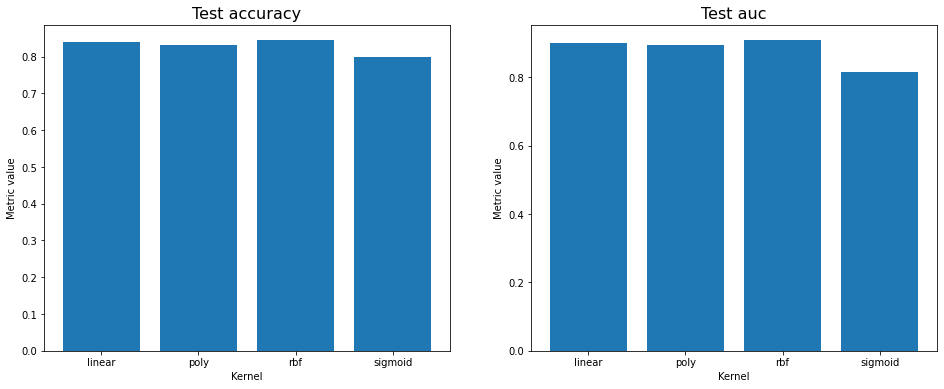

Maximal test Accuracy - 0.8448484848484848 - is obtained for kernel = rbf
Maximal test auc - 0.9089903678814172 - is obtained for kernel = rbf


In [62]:
y_train=y_train.astype('int').flatten() #flattening list as it is column vector now
y_test=y_test.astype('int').flatten() #flattening list as it is column vector now
plot_per_kernel_performance(X_train,X_test,y_train,y_test)

Fitting logistic regression and plotting performance on test dataset for different value for regularization parameter

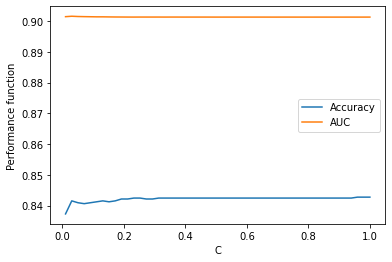

Maximal test Accuracy - 0.8427272727272728 - is obtained for c = 0.9595918367346938
Maximal test auc - 0.9015435505421393 - is obtained for c = 0.030204081632653063


In [63]:
C = np.linspace(0.01,1)
_, _ = error_c_Logistic(X_train,X_test,y_train,y_test,C)

Fitting LDA model based on different shrinkage parameter

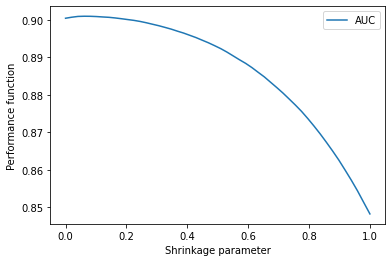

Maximal test auc - 0.9009850819567295 - is obtained for shrinkage = 0.061224489795918366


In [64]:
test_auc = list()
shrinks = np.linspace(0,1)

for s in shrinks:
    #fitting model on train data
    model = LinearDiscriminantAnalysis(shrinkage = s,
                                      solver = "lsqr")
    model.fit(X_train, y_train)

    #calculating performance score on test data
    auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    
    #storing metrics value in list
    test_auc.append(auc)

plt.plot(shrinks, test_auc, label = "AUC")
plt.xlabel('Shrinkage parameter')
plt.ylabel('Performance function')
plt.legend()
plt.show()
s_max_auc = shrinks[test_auc.index(max(test_auc))]
print(f"Maximal test auc - {max(test_auc)} - is obtained for shrinkage = {s_max_auc}")

Fitting Logistic Regression with polynomial kernel

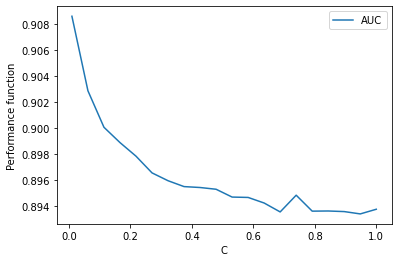

Maximal test auc - 0.9085771304185244 - is obtained for c = 0.01


In [65]:
test_auc = list()
C = np.linspace(0.01,1,20)
for c in C:
    #fitting model
    model = Logit_Kernel(C = c)
    model.fit(X_train, y_train)
    
    #calculating performance score on test data
    auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

    #storing model performance
    test_auc.append(auc)

plt.plot(C, test_auc, label = "AUC")
plt.xlabel('C')
plt.ylabel('Performance function')
plt.legend()
plt.show()
c_max_auc = C[test_auc.index(max(test_auc))]
print(f"Maximal test auc - {max(test_auc)} - is obtained for c = {c_max_auc}")

Out of of trained models the highest test AUC is returnd for SVM model with rbf kernel: 

auc $\approx$ 0.91

However after finetuning (after choosing the best parameter out of considered) all of the models performance is similar.